# 6MWT Total Sample Check

### healthCodes of interest/associated synapse table:

1. cab9f4ee-54e0-4b08-8eba-3b48085bd142 (v4-v1)
2. 33f22bad-4570-43bb-bf68-263e6865ef76 (v4-v1)
3. ff489c8a-f5ff-4f00-9682-33c44df02621 (v4-v2)
4. 6fd3148e-f490-417a-9da8-a31d947e7aed (v4-v1)
5. bb6613c1-5b48-4744-a5f5-2387149da94d (v4-v2)
6. 43dcb6b4-24a9-4b71-bc9f-eef87e8adadb (v4-v2)
7. fe1e5f81-ed68-4c45-b1a7-3a7443d5ae76 (v4-v2)
8. 047b75f9-2778-4068-bc30-d47e8ea0780e (v4-v1)
9. c6a9c011-defc-48a9-bd74-de6d3a72d2bd (v4-v2)
10. e30dae44-8b7e-41a5-98e5-3f8abba35352 (v4-v1)

In [3]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# hc_filenum is the dictionary which stores the healthCode and num of files associated with that healthCode

# num_of_files is just a list to count number of instances of certain number of files (Are there 0 files, 1 file...?)

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)
hc_filenum = dict()
for subdir, dirs, files in os.walk(directory):
    i = 0
    for file in files:
        i += 1
    hc_filenum.update({subdir.decode()[subdir.decode().rfind('/') + 1:]: i})


num_of_files = []
for k, v in hc_filenum.items():
        num_of_files.append(v)

In [4]:
print(num_of_files.count(0))
print(len(hc_filenum))

2291
8129


In [3]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
sns.set()

file = "data/demographics.csv"
csv = pd.read_csv(file, low_memory=False)

csv.drop(columns=['ROW_ID', 'ROW_VERSION', 'appVersion', 'phoneInfo', 'dataGroups', 'uploadDate', 'createdOn', 
                  'validationErrors', 'userSharingScope', 'NonIdentifiableDemographics.json.patientGoSleepTime', 
                  'NonIdentifiableDemographics.patientGoSleepTime', 'createdOnTimeZone',
                 'NonIdentifiableDemographics.json.patientWakeUpTime', 'NonIdentifiableDemographics.patientWakeUpTime'
                 , 'externalId'], 
         inplace=True)
csv.rename(columns={'NonIdentifiableDemographics.json.patientWeightPounds': 'weight', 'NonIdentifiableDemographics.patientWeightPounds': 'weight2', 
                    'NonIdentifiableDemographics.json.patientBiologicalSex': 'sex', 
                    'NonIdentifiableDemographics.patientBiologicalSex': 'sex2',
                   'NonIdentifiableDemographics.json.patientHeightInches': 'height',
                   'NonIdentifiableDemographics.patientHeightInches': 'height2',
                   'NonIdentifiableDemographics.json.patientCurrentAge': 'currentAge',
                   'NonIdentifiableDemographics.patientCurrentAge': 'currentAge2'}, inplace=True)

# drop the test version
csv = csv.iloc[7:]
csv.index = range(44804)

csv.dropna(how='all', subset=['currentAge','currentAge2'], inplace=True)
csv.dropna(how='all', subset=['weight', 'weight2'], inplace=True)
csv.dropna(how='all', subset=['sex', 'sex2'], inplace=True)
csv.dropna(how='all', subset=['height', 'height2'], inplace=True)

csv


,recordId,healthCode,weight,weight2,sex,sex2,height,height2,currentAge,currentAge2
0,77f77904-6969-4b69-b408-131d7e434938,9c0a77cd-159b-423b-8e73-b7f3666ba938,180.0,NaN,Female,NaN,66.0,NaN,51.0,NaN
1,de3b154b-fe81-4ef7-b392-e51c36137e12,c4ed1db6-9bc0-46e5-a296-fd452a773072,142.0,NaN,Male,NaN,67.0,NaN,18.0,NaN
2,5fd22a4b-b573-4a14-9503-9f4027a1822c,e4c01bfb-9688-4b96-9e80-137b3b0a6a4c,190.0,NaN,Male,NaN,68.0,NaN,44.0,NaN
3,8712c75a-2a69-41d7-9baf-eb3569e011af,c4ed1db6-9bc0-46e5-a296-fd452a773072,142.0,NaN,Male,NaN,67.0,NaN,18.0,NaN
4,2ee84b1b-ce33-405f-a27e-ab9ca150fe3b,90ccc54e-7916-4042-871b-bc25cc58867e,245.0,NaN,Male,NaN,68.0,NaN,42.0,NaN
5,ba83c4a7-1bb8-46b6-829b-e6ef7ff9696c,7008bee7-5a68-46a9-80a0-0f280df94f6d,221.0,NaN,Male,NaN,68.0,NaN,39.0,NaN
6,03793227-ab8f-41ff-bc17-039b6eaa56db,d670264b-3edc-4d1f-b42d-6430bf9efb70,140.0,NaN,Male,NaN,66.0,NaN,28.0,NaN
7,43828c79-e658-4eca-a9ac-9fa27329fe4b,620e7c23-16bf-4b7c-80a1-af3a15e900a2,217.0,NaN,Male,NaN,70.0,NaN,32.0,NaN
8,6788bff0-b65c-406f-b4c0-7f4a0cfdae20,74982b88-b3b3-4aa4-a7f1-715df241ab44,207.0,NaN,Male,NaN,72.0,NaN,41.0,NaN
9,bd5a34bc-7617-4ed2-a888-b57a1830f419,280f17b1-8b9e-40b5-9dd5-9c6d1e1b10ee,140.0,NaN,Male,NaN,69.0,NaN,36.0,NaN


In [ ]:


csv['currentAge'] = csv['currentAge'].fillna(csv['currentAge2'])
csv['weight'] = csv['weight'].fillna(csv['weight2'])
csv['height'] = csv['height'].fillna(csv['height2'])
csv['sex'] = csv['sex'].fillna(csv['sex2'])
csv = csv.drop('currentAge2',1)
csv = csv.drop('weight2',1)
csv = csv.drop('height2',1)
csv = csv.drop('sex2',1)

# Dropping the duplicate healthCode records... Don't know if this is the right thing to do but can easily be reversed
csv = csv.drop_duplicates(subset='healthCode', keep='last', inplace=False)

# Dropping the rows with 0 for any metric. This was not caught with the NaN cleaning/merging 
csv = csv[csv.currentAge != 0]
csv = csv[csv.weight != 0]
csv = csv[csv.height != 0]

In [ ]:
import sys, os
import numpy as np
import itertools as it
import pandas as pd

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

final_directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwtwindows'
final_directory = os.fsencode(final_directory_in_str)

# Set overlap to the amount you want the sliding windows to have in common 
# Example: If your sliding windows are of length 200 ms (2 seconds), make the overlap 99 for half of the window to overlap 
def moving_window(accelx, length, overlap, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + overlap) for stream, i in zip(streams, it.count(step=step))])

def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())

# Just get from the 173 valid files we have 
def create_dataframes(num_of_ms, overlap, fn):
    for subdir, dirs, files in os.walk(directory):
        # You can choose to get the non mean normalized version by not calling the normalize_dataset function
        a_df = normalize_dataset(pd.read_json(fn).set_index('timestamp'))
        x = np.asarray(a_df.x)
        y = np.asarray(a_df.y)
        z = np.asarray(a_df.z)
        x_ = list(moving_window(x, num_of_ms, overlap))
        y_ = list(moving_window(y, num_of_ms, overlap))
        z_ = list(moving_window(z, num_of_ms, overlap))
        df = pd.DataFrame({'healthCode': subdir.decode()[subdir.decode().rfind('/')+1:], 
        'xwindows': x_, 'ywindows': y_, 'zwindows': z_}, columns=['healthCode', 'xwindows', 
        'ywindows', 'zwindows']).setIndex('healthCode')

        if not os.path(final_directory.decode() + '/' + subdir.decode()[subdir.decode().rfind('/')+1:] + str(num_of_ms) + str(overlap)):
            os.makedirs(final_directory.decode() + '/' + subdir.decode()[subdir.decode().rfind('/')+1:] + str(num_of_ms) + str(overlap))
        df.to_hdf(final_directory.decode() + '/' + subdir.decode()[subdir.decode().rfind('/')+1:] + str(num_of_ms) + str(overlap))


In [24]:
import pandas as pd
import numpy as np
import os
import itertools as it

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

def moving_window(accelx, length, overlap, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + overlap) for stream, i in zip(streams, it.count(step=step))])

def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())



for subdir, dirs, files in os.walk(directory):
    for file in files:
        test_df = normalize_dataset(pd.read_json(os.path.join(subdir.decode(), file.decode())).set_index('timestamp'))
        x = np.asarray(test_df.x)
        y = np.asarray(test_df.y)
        z = np.asarray(test_df.z)
        x_ = list(moving_window(x, 200, 99))
        y_ = list(moving_window(y, 200, 99))
        z_ = list(moving_window(z, 200, 99))

        df = pd.DataFrame({'healthCode': subdir.decode()[subdir.decode().rfind('/')+1:], 
                'xwindows': x_, 'ywindows': y_, 'zwindows': z_}, columns=['healthCode', 'xwindows', 
                'ywindows', 'zwindows']).set_index('healthCode')
        df.head()
        break

KeyboardInterrupt: 

In [39]:
test_df = normalize_dataset(pd.read_json('data/test_accel_old.json')).set_index('timestamp')
x = np.asarray(test_df.x)
y = np.asarray(test_df.y)
z = np.asarray(test_df.z)
x_ = list(moving_window(x, 200, 99))
y_ = list(moving_window(y, 200, 99))
z_ = list(moving_window(z, 200, 99))

df = pd.DataFrame({'healthCode': 'hello', 
            'xwindows': x_, 'ywindows': y_, 'zwindows': z_}, columns=['healthCode', 'xwindows', 
            'ywindows', 'zwindows']).set_index('healthCode')
df.to_hdf('data/df.h5', key='df', mode='w')

/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [3]:
# testing for generate_windows
import sys, os, errno
import numpy as np
import itertools as it
import pandas as pd

directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwt/accel_walk_dir'
directory = os.fsencode(directory_in_str)

final_directory_in_str = '/scratch/PI/euan/projects/mhc/data/6mwtwindows'
final_directory = os.fsencode(final_directory_in_str)

# Set overlap to the amount you want the sliding windows to have in common 
# Example: If your sliding windows are of length 200 ms (2 seconds), make the overlap 99 for half of the window to overlap 
def moving_window(accelx, length, overlap, step=1):
    streams = it.tee(accelx, length)
    return zip(*[it.islice(stream, i, None, step + overlap) for stream, i in zip(streams, it.count(step=step))])

def normalize_dataset(dataframe):
    return (dataframe - dataframe.mean())

def create_dataframes(num_of_ms, overlap):
    for subdir, dirs, files in os.walk(directory):
        i = 0
        for file in files:
            while (i < 1):
                # You can choose to get the non mean normalized version by not calling the normalize_dataset function
                a_df = normalize_dataset(pd.read_json(os.path.join(subdir.decode(), file.decode())).set_index('timestamp'))
                x = np.asarray(a_df.x)
                y = np.asarray(a_df.y)
                z = np.asarray(a_df.z)
                x_ = list(moving_window(x, num_of_ms, overlap))
                y_ = list(moving_window(y, num_of_ms, overlap))
                z_ = list(moving_window(z, num_of_ms, overlap))
                df = pd.DataFrame({'healthCode': subdir.decode()[subdir.decode().rfind('/')+1:], 
                'xwindows': x_, 'ywindows': y_, 'zwindows': z_}, columns=['healthCode', 'xwindows', 
                'ywindows', 'zwindows']).set_index('healthCode')

                
                if not os.path.exists(final_directory.decode() + '/' + subdir.decode()[subdir.decode().rfind('/')+1:] + '/' + str(num_of_ms) + '/' + str(overlap)):
                    os.makedirs(final_directory.decode() + '/' + subdir.decode()[subdir.decode().rfind('/')+1:] + '/' + str(num_of_ms) + '/' + str(overlap))
                df.to_hdf(final_directory.decode() + '/' + subdir.decode()[subdir.decode().rfind('/')+1:] + '/' + str(num_of_ms) + '/' + str(overlap) + '/' + subdir.decode()[subdir.decode().rfind('/')+1:] + str(num_of_ms) + str(overlap) +'.h5', key='df', mode='w')
                i += 1


In [125]:
create_dataframes(200, 99)

/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows',

/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows',

/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows',

/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows', 'zwindows']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/home/users/bhargavy/.local/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['xwindows', 'ywindows',

KeyboardInterrupt: 

In [1]:
# OLD DATA
import numpy as np
import pandas as pd

newtotal_df  = pd.read_hdf('newtotal_df.h5', 'df')

In [1]:
# Very important to run for any number of samples as it makes the feature frame uniform
def find_lowest_num_samples(total_df):
    '''
    This function finds the minimum number of samples from all of the runs present so that we keep same dimensions
    for every run that we have
    '''
    total = [len(total_df.loc[x].average_accel) for x in list(set(total_df.index))]
    return min(total)

def min_df(lowest_num_of_samples, total_df):
    '''
    Returns the dataframe with features for every healthCode present so that there are only the minimum amount of 
    samples needed
    '''
    newdf = pd.DataFrame()
    unique_healthcodes = list(set(total_df.index))
    for elem in unique_healthcodes:
        newdf = newdf.append(total_df.loc[elem].iloc[:lowest_num_of_samples])
    return newdf

In [62]:
everything = min_df(find_lowest_num_samples(newtotal_df), newtotal_df)

NameError: name 'newtotal_df' is not defined

In [4]:
everything = everything[everything.weight < 400]
everything = everything[everything.weight > 80]

# this dataframe doesn't have demographic data
everything_no_demog = everything.drop(columns=['sex', 'currentAge', 'weight', 'height'])

In [5]:
everything.head()

,weight,height,sex,currentAge,fundamental_freq,average_accel,peakcount,max,min,mut_x,...,medf_y,medf_z,cross_xz,cross_yz,spect_cent_x,spect_cent_y,spect_cent_z,average_dist_meanx,average_dist_meany,average_dist_meanz
healthCode,,,,,,,,,,,,,,,,,,,,,
90839249-5057-4ccc-b0ce-a73dad2be07c,247.0,62.0,Female,61.0,108.314444,1.361654,12,2.064969,-0.330143,0.690610,...,-0.815326,0.261730,-1.108732,1.423415,0.303866,0.484718,0.891400,0.240233,0.241233,0.312021
90839249-5057-4ccc-b0ce-a73dad2be07c,247.0,62.0,Female,61.0,95.117992,1.399965,13,2.064969,-0.330143,0.802499,...,-0.900119,0.383518,-1.424095,1.614554,0.055270,0.206965,0.505872,0.215864,0.247436,0.306005
90839249-5057-4ccc-b0ce-a73dad2be07c,247.0,62.0,Female,61.0,93.161575,1.300919,12,1.786842,-0.142095,0.615637,...,-0.781222,0.208414,-0.773675,0.980318,0.896903,0.608516,0.523008,0.192852,0.216332,0.278009
90839249-5057-4ccc-b0ce-a73dad2be07c,247.0,62.0,Female,61.0,100.162152,1.274289,10,1.683957,-0.142095,0.531247,...,-0.779094,0.077215,-0.622452,0.878936,0.177303,0.664331,1.269846,0.169978,0.200500,0.262656
90839249-5057-4ccc-b0ce-a73dad2be07c,247.0,62.0,Female,61.0,108.066819,1.299515,10,1.729218,-0.205279,0.581625,...,-0.737040,0.084270,-0.669505,0.852864,0.319803,0.922528,1.160783,0.156258,0.195590,0.256213


In [6]:
everything_no_demog

,fundamental_freq,average_accel,peakcount,max,min,mut_x,mut_y,mut_z,muf_x,muf_y,...,medf_y,medf_z,cross_xz,cross_yz,spect_cent_x,spect_cent_y,spect_cent_z,average_dist_meanx,average_dist_meany,average_dist_meanz
healthCode,,,,,,,,,,,,,,,,,,,,,
90839249-5057-4ccc-b0ce-a73dad2be07c,108.314444,1.361654,12,2.064969,-0.330143,0.690610,-0.886621,-0.622883,2.408580,2.420899,...,-0.815326,0.261730,-1.108732,1.423415,0.303866,0.484718,0.891400,0.240233,0.241233,0.312021
90839249-5057-4ccc-b0ce-a73dad2be07c,95.117992,1.399965,13,2.064969,-0.330143,0.802499,-0.909826,-0.563515,2.063195,2.432729,...,-0.900119,0.383518,-1.424095,1.614554,0.055270,0.206965,0.505872,0.215864,0.247436,0.306005
90839249-5057-4ccc-b0ce-a73dad2be07c,93.161575,1.300919,12,1.786842,-0.142095,0.615637,-0.780069,-0.795731,1.537021,1.699596,...,-0.781222,0.208414,-0.773675,0.980318,0.896903,0.608516,0.523008,0.192852,0.216332,0.278009
90839249-5057-4ccc-b0ce-a73dad2be07c,100.162152,1.274289,10,1.683957,-0.142095,0.531247,-0.750150,-0.853475,1.151398,1.632215,...,-0.779094,0.077215,-0.622452,0.878936,0.177303,0.664331,1.269846,0.169978,0.200500,0.262656
90839249-5057-4ccc-b0ce-a73dad2be07c,108.066819,1.299515,10,1.729218,-0.205279,0.581625,-0.740917,-0.868740,1.131018,1.579905,...,-0.737040,0.084270,-0.669505,0.852864,0.319803,0.922528,1.160783,0.156258,0.195590,0.256213
90839249-5057-4ccc-b0ce-a73dad2be07c,109.731461,1.307171,8,1.862491,-0.205279,0.613979,-0.713431,-0.877655,1.197633,1.555487,...,-0.714885,0.182796,-0.699567,0.812884,0.374420,0.966315,1.395159,0.147237,0.194389,0.253153
90839249-5057-4ccc-b0ce-a73dad2be07c,107.141324,1.307852,10,1.862491,-0.117244,0.620030,-0.699920,-0.883751,1.157659,1.531361,...,-0.726893,0.146422,-0.701589,0.791987,0.341018,0.678090,1.303551,0.139344,0.190995,0.248046
90839249-5057-4ccc-b0ce-a73dad2be07c,103.723405,1.313845,9,1.831361,-0.116085,0.668747,-0.721150,-0.849102,1.293646,1.541653,...,-0.706561,0.157716,-0.787594,0.849309,0.539139,0.792449,0.934569,0.135015,0.185874,0.242997
90839249-5057-4ccc-b0ce-a73dad2be07c,95.706105,1.338492,9,1.831361,-0.116085,0.723892,-0.692789,-0.866560,1.400238,1.525359,...,-0.656978,0.252391,-0.835363,0.799470,0.356895,0.415980,1.094721,0.131864,0.181516,0.239425


In [7]:
BMI = []
for q in list(set(everything_no_demog.index.values)):
    temp = []
    temp.append(((everything.loc[q].weight.values) / (((everything.loc[q].height.values)**2))) * 703)
    BMI.append(temp)
    
BMI = np.array(BMI)
BMI = BMI.flatten()

In [7]:
# This code inserts BMI directly
#everything_no_demog.insert(25, 'BMI', BMI)

# This code inserts sex into the no demog df so that it can be used for training/testing
everything_no_demog.insert(25, 'sex', everything.sex.values)

In [11]:
# Lower the number of trees to reduce overfitting
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
numOfTotalHC = 173
numOfTrainHC = 103
numOfTestHC = 70


# Shouldn't have to one-hot encode the sex because using random forest
# One-hot encode ouput
training = everything_no_demog.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]
testing = everything_no_demog.iloc[(numOfTrainHC * find_lowest_num_samples(newtotal_df)):]

#uniques, labelings = pd.factorize(training.sex.values)
#training.drop(['sex'], axis=1, inplace=True)
#training.insert(25, 'sex_encoded', uniques)

X = np.array(training.iloc[:, 0:25])
X_scaled = preprocessing.scale(X)
y = np.array(training.iloc[:, 25])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

X_mixed = np.concatenate((X_train, X_test), axis=0)
y_mixed = np.concatenate((y_train, y_test), axis=0)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfopts = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfopts, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_mixed, y_mixed)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=52, min_sample

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.2min


[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total= 3.1min
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 3.1min
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 3.1min
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 3.1min
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samp

[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed: 13.9min remaining:  1.5min


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total= 4.7min
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 8.9min
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 8.9min
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 8.8min
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 8.9min


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 14.1min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [43]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 94}

In [46]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
numOfTotalHC = 173
numOfTrainHC = 103
numOfTestHC = 70


# Shouldn't have to one-hot encode the sex because using random forest
# One-hot encode ouput
training = everything_no_demog.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]
testing = everything_no_demog.iloc[(numOfTrainHC * find_lowest_num_samples(newtotal_df)):]

#uniques, labelings = pd.factorize(training.sex.values)
#training.drop(['sex'], axis=1, inplace=True)
#training.insert(25, 'sex_encoded', uniques)

X = np.array(training.iloc[:, 0:25])
X_scaled = preprocessing.scale(X)
y = np.array(training.iloc[:, 25])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)


newrf = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=2, min_samples_leaf=2, bootstrap=False)
scores_old = cross_val_score(newrf, X_scaled, y, cv=5, scoring='accuracy')

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
sample_weight = np.array([4 if i == 'Female' else 1 for i in list(testing.iloc[:, 25])])
newrf.score(testing.iloc[:, 0:25], testing.iloc[:, 25], sample_weight=sample_weight)
#cohen_kappa_score(testing.iloc[:, 25], newrf.predict(testing.iloc[:, 0:25]))
#confusion_matrix(testing.iloc[:, 25], newrf.predict(testing.iloc[:, 0:25]), sample_weight=sample_weight) 

ValueError: bad input shape (24640, 2)

# Downsampling the males (old data)

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

numOfTotalHC = 173
numOfTrainHC = 103
numOfTestHC = 70


# Shouldn't have to one-hot encode the sex because using random forest
# One-hot encode ouput
training = everything_no_demog.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]
testing = everything_no_demog.iloc[(numOfTrainHC * find_lowest_num_samples(newtotal_df)):]

Xmale = np.array(choppedmale_train.iloc[:, 0:25])
Xfemale = np.array(female_train.iloc[:, 0:25])
X_scaledmale = preprocessing.scale(Xmale)
X_scaledfemale = preprocessing.scale(Xfemale)

X_scaledtotal = np.array(list(X_scaledmale)+list(X_scaledfemale))
y_total = np.array(list(choppedmale_train.iloc[:, 25]) + list(female_train.iloc[:, 25]))

X_train, X_test, y_train, y_test = train_test_split(X_scaledtotal, y_total, test_size=0.33, random_state=42)


X_mixedequal = np.concatenate((X_train, X_test), axis=0)
y_mixedequal = np.concatenate((y_train, y_test), axis=0)


# Taking from the training 
female_train = training.loc[training['sex'] == 'Female']
male_train = training.loc[training['sex'] == 'Male']

In [27]:
# Dataframe with the downsampled males
choppedmale_train = male_train.iloc[0:9000]

In [22]:
male_zero, label = pd.factorize(y_mixedequal)

In [23]:
list(male_zero).count(1)

9152

In [31]:
print(len(choppedmale_train))
len(female_train)
len(male_zero)

9000


11152

In [33]:
len(X_mixedequal)

18152

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
numOfTotalHC = 173
numOfTrainHC = 103
numOfTestHC = 70


# Shouldn't have to one-hot encode the sex because using random forest
# One-hot encode ouput
training = everything_no_demog.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]
testing = everything_no_demog.iloc[(numOfTrainHC * find_lowest_num_samples(newtotal_df)):]

#uniques, labelings = pd.factorize(training.sex.values)
#training.drop(['sex'], axis=1, inplace=True)
#training.insert(25, 'sex_encoded', uniques)

Xmale = np.array(choppedmale_train.iloc[:, 0:25])
Xfemale = np.array(female_train.iloc[:, 0:25])
X_scaledmale = preprocessing.scale(Xmale)
X_scaledfemale = preprocessing.scale(Xfemale)

X_scaledtotal = np.array(list(X_scaledmale)+list(X_scaledfemale))
y_total = np.array(list(choppedmale_train.iloc[:, 25]) + list(female_train.iloc[:, 25]))

X_train, X_test, y_train, y_test = train_test_split(X_scaledtotal, y_total, test_size=0.33, random_state=42)


X_mixedequal = np.concatenate((X_train, X_test), axis=0)
y_mixedequal = np.concatenate((y_train, y_test), axis=0)

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
dsrf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = dsrf, param_distributions = random_grid, n_iter = 20, scoring='average_precision', cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_mixedequal, male_zero)

ValueError: Found input variables with inconsistent numbers of samples: [18152, 11152]

In [23]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [25]:
dsrf = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_split=2, min_samples_leaf=2, bootstrap=False, random_state=42)
dsrf.fit(X_mixedequal, male_zero)
scores = cross_val_score(dsrf, X_mixedequal, male_zero, cv=5, scoring='average_precision')

In [26]:
scores

array([0.99992559, 0.99997768, 0.99994408, 0.9998837 , 0.99998214])

In [27]:
len(female_train.iloc[:, 25])

9152

In [37]:
female_one = [1 for x in range(0, 5632)]

In [38]:
dsrf.score(female.iloc[:, 0:25], female_one)

0.7959872159090909

In [40]:
len(male.iloc[:, 25])
male_zero_test = [0 for y in range(0, 19008)]

In [42]:
dsrf.score(male.iloc[:, 0:25], male_zero_test)

0.19681186868686867

In [43]:
len(testing)

24640

In [48]:
totallabel = [1 if x=='Female' else 0 for x in testing.iloc[:, 25]]

In [49]:
list(totallabel).count(1)

5632

In [50]:
dsrf.score(testing.iloc[:, 0:25], totallabel)

0.33376623376623377

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
#sample_weight = np.array([4 if i == 'Female' else 1 for i in list(testing.iloc[:, 25])])
#newrf.score(testing.iloc[:, 0:25], testing.iloc[:, 25], sample_weight=sample_weight)
cohen_kappa_score(testing.iloc[:, 25], dsrf.predict(testing.iloc[:, 0:25]))
#confusion_matrix(testing.iloc[:, 25], dsrf.predict(testing.iloc[:, 0:25])) 

-0.009267840593141896

In [33]:
numOfTotalHC = 173
numOfTrainHC = 103
numOfTestHC = 70
testing = everything_no_demog.iloc[(numOfTrainHC * find_lowest_num_samples(newtotal_df)):]

female = testing.loc[testing['sex'] == 'Female']

In [34]:
female.head()

,fundamental_freq,average_accel,peakcount,max,min,mut_x,mut_y,mut_z,muf_x,muf_y,...,medf_z,cross_xz,cross_yz,spect_cent_x,spect_cent_y,spect_cent_z,average_dist_meanx,average_dist_meany,average_dist_meanz,sex
healthCode,,,,,,,,,,,,,,,,,,,,,
1a254ea6-2875-4394-9b92-515f89aac1c0,123.003682,1.761073,10,2.644966,0.265567,-0.220573,-1.519599,-0.739240,1.983707,3.083983,...,0.282210,0.298378,2.055623,0.229315,1.465557,0.832902,0.230915,0.189005,0.264621,Female
1a254ea6-2875-4394-9b92-515f89aac1c0,120.408201,1.742037,13,2.644966,0.143988,-0.270648,-1.482989,-0.726592,1.983050,2.995173,...,0.284106,0.372490,2.041019,0.087680,1.637327,0.897205,0.230161,0.202340,0.301559,Female
1a254ea6-2875-4394-9b92-515f89aac1c0,112.320329,1.638993,12,2.506517,0.143988,-0.210871,-1.288581,-0.883986,1.580715,3.059265,...,0.478444,0.238546,1.457694,0.282907,2.576500,0.348468,0.214125,0.184547,0.315410,Female
1a254ea6-2875-4394-9b92-515f89aac1c0,111.140727,1.565864,20,3.112473,-0.430623,-0.600329,-0.939812,-0.573548,3.857549,4.052695,...,2.647426,1.046692,1.638592,0.613110,1.370520,1.541681,0.274628,0.239210,0.362077,Female
1a254ea6-2875-4394-9b92-515f89aac1c0,104.537138,1.232072,19,3.112473,-1.048801,-0.729662,-0.353179,-0.000325,4.181419,4.843472,...,3.211494,2245.883523,1087.078214,0.209053,0.661385,1.787723,0.312203,0.297326,0.382888,Female


In [35]:
male = testing.loc[testing['sex'] == 'Male']
male

,fundamental_freq,average_accel,peakcount,max,min,mut_x,mut_y,mut_z,muf_x,muf_y,...,medf_z,cross_xz,cross_yz,spect_cent_x,spect_cent_y,spect_cent_z,average_dist_meanx,average_dist_meany,average_dist_meanz,sex
healthCode,,,,,,,,,,,,,,,,,,,,,
c2d81032-d514-4db0-967e-cd7da168e149,84.093790,1.183311,17,1.735415,-0.093085,0.544209,-0.835330,-0.556319,1.711133,1.428328,...,0.345499,-0.978232,1.501529,0.401588,0.635471,0.261587,0.189971,0.066015,0.219167,Male
c2d81032-d514-4db0-967e-cd7da168e149,92.089151,1.342022,22,1.903300,-0.093085,0.839665,-0.898862,-0.440043,2.086170,1.598540,...,0.399225,-1.908143,2.042669,0.079886,0.668962,0.220937,0.181666,0.070069,0.225696,Male
c2d81032-d514-4db0-967e-cd7da168e149,104.641810,1.389768,21,2.007266,-0.088764,0.942869,-0.922103,-0.364584,2.173094,1.834422,...,0.400768,-2.586148,2.529189,1.086869,1.027991,0.568184,0.182744,0.078027,0.211303,Male
c2d81032-d514-4db0-967e-cd7da168e149,79.819556,1.157167,19,2.007266,-0.781718,0.769605,-0.632780,-0.461603,2.016581,2.401082,...,0.201667,-1.667245,1.370832,0.607490,1.018372,0.019616,0.183512,0.128274,0.214012,Male
c2d81032-d514-4db0-967e-cd7da168e149,72.891574,0.944486,17,1.329425,-0.781718,0.599926,-0.339092,-0.584421,1.330641,1.309831,...,0.291241,-1.026531,0.580219,0.715500,0.188665,0.331627,0.165407,0.136041,0.215774,Male
c2d81032-d514-4db0-967e-cd7da168e149,66.836892,0.906129,14,1.276772,-0.666723,0.567256,-0.304049,-0.560532,1.236783,1.375709,...,0.192802,-1.011996,0.542428,0.214774,0.047958,0.079783,0.154599,0.144718,0.214896,Male
c2d81032-d514-4db0-967e-cd7da168e149,60.719927,0.850874,13,1.276772,-0.666723,0.552406,-0.296679,-0.490727,1.277836,1.575615,...,0.546107,-1.125689,0.604570,0.264018,0.079070,0.212707,0.145825,0.149558,0.212353,Male
c2d81032-d514-4db0-967e-cd7da168e149,61.370547,0.831472,13,1.254676,-0.550120,0.580600,-0.250549,-0.453239,1.327007,1.598099,...,0.084389,-1.281004,0.552797,0.473761,0.030326,0.220903,0.140423,0.153129,0.207136,Male
c2d81032-d514-4db0-967e-cd7da168e149,66.212932,0.831623,9,1.254676,-0.526269,0.601940,-0.178678,-0.460331,1.289884,1.665117,...,0.340095,-1.307624,0.388151,0.556822,0.106259,0.624609,0.135938,0.155627,0.203303,Male


In [14]:
len(female)

7040

In [156]:
results_male=[]
for i in range(0, len(list(male.iloc[:, 25]))):
    if list(clf.predict(male.iloc[:, 0:25]))[i] != male.iloc[:, 25][i]:
        results_male.append(False)

In [15]:
len(female)

4576

In [16]:
len(male)

20064

In [79]:
chopped_male = male_train.iloc[0:4576]

In [80]:
len(chopped_male)

4576

# Models with over 300 unique subjects

1. Random Forest Classification
2. Random Forest Regression
2. K Nearest Neighbor

In [40]:
# RUN THIS CELL TO READ IN THE H5 FILE

import numpy as np
import pandas as pd

tengaps_total  = pd.read_hdf('tengaps_total.h5', 'df')

# Min number of samples is 352... total subjects after filtering is 311
tengaps_total = min_df(find_lowest_num_samples(tengaps_total), tengaps_total)

In [41]:
tengaps_total = tengaps_total[tengaps_total.weight < 400]
tengaps_total = tengaps_total[tengaps_total.weight > 80]

# this dataframe doesn't have demographic data
tengaps_no_demog = tengaps_total.drop(columns=['sex', 'currentAge', 'weight', 'height'])

# Inserts sex into 

#tengaps_no_demog.insert(25, 'currentAge', tengaps_total.currentAge.values)
#tengaps_no_demog.insert(26, 'weight', tengaps_total.weight.values)
#tengaps_no_demog.insert(27, 'height', tengaps_total.height.values)
tengaps_no_demog.insert(25, 'sex', tengaps_total.sex.values)
tengaps_no_demog

,fundamental_freq,average_accel,peakcount,max,min,mut_x,mut_y,mut_z,muf_x,muf_y,...,medf_z,cross_xz,cross_yz,spect_cent_x,spect_cent_y,spect_cent_z,average_dist_meanx,average_dist_meany,average_dist_meanz,sex
healthCode,,,,,,,,,,,,,,,,,,,,,
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,80.317635,1.101210,17,2.143267,-3.015490,0.399885,-0.597875,-0.570088,2.706136,3.721300,...,1.024757,-0.701445,1.048742,0.972882,2.182844,1.582017,0.517323,0.568784,0.386417,Female
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,38.083914,0.427346,7,1.006866,-3.045824,-0.057948,-0.067404,-0.078100,1.599965,1.706091,...,0.243954,0.741968,0.863040,0.053480,0.077227,0.079480,0.393835,0.392307,0.277441,Female
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,36.266223,0.414729,11,0.795667,-4.162361,0.010990,-0.121640,0.016409,1.233173,1.099697,...,0.103315,0.669768,-7.413123,0.240560,0.035527,0.016021,0.366362,0.327574,0.209817,Female
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,36.063199,0.403054,12,0.763178,-4.162361,0.028150,-0.134769,-0.005430,1.244109,1.140910,...,0.072295,-5.184453,24.820875,0.220195,0.042900,0.013047,0.347282,0.293034,0.177266,Female
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,39.833932,0.395897,12,0.805862,-3.484050,0.015722,-0.123211,-0.007962,1.277820,1.117586,...,0.111486,-1.974480,15.474189,0.322941,0.020514,0.007707,0.335096,0.271001,0.159870,Female
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,40.572347,0.386141,11,0.805862,-3.331733,-0.009309,-0.103373,-0.015332,1.168532,1.068780,...,0.120747,0.607182,6.742411,0.332373,0.021014,0.013244,0.325556,0.256530,0.148543,Female
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,40.544675,0.389475,10,0.883401,-3.331733,-0.013233,-0.073333,-0.019231,1.248801,1.131872,...,0.077935,0.688129,3.813308,0.301156,0.012263,0.008668,0.318741,0.248437,0.140951,Female
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,39.815055,0.391514,9,0.883401,-2.900933,-0.007431,-0.092426,-0.007466,1.241145,1.226106,...,0.106640,0.995236,12.378906,0.243073,0.041197,0.008781,0.312888,0.242275,0.135897,Female
cb2f2d4b-dd77-4084-baea-74ecbd8774b5,38.169775,0.403056,10,1.031602,-2.900933,0.004995,-0.163079,-0.011702,1.294036,1.179408,...,0.069943,-0.426892,13.936223,0.190484,0.042568,0.030016,0.306509,0.236810,0.131662,Female


In [42]:
# This cell is dedicated to creating a balanced class training set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

numOfTotalHC = 311
numOfTrainHC = 217
numOfTestHC = 94

training = tengaps_no_demog.iloc[0:(numOfTrainHC * find_lowest_num_samples(tengaps_no_demog))]
testing = tengaps_no_demog.iloc[(numOfTrainHC * find_lowest_num_samples(tengaps_no_demog)):]

female_train = training.loc[training['sex'] == 'Female']
male_train = training.loc[training['sex'] == 'Male']
choppedmale_train = male_train.iloc[0:17000]

Xmale = np.array(choppedmale_train.iloc[:, 0:25])
Xfemale = np.array(female_train.iloc[:, 0:25])
X_scaledmale = preprocessing.scale(Xmale)
X_scaledfemale = preprocessing.scale(Xfemale)

X_scaledtotal = np.array(list(X_scaledmale)+list(X_scaledfemale))
y_total = np.array(list(choppedmale_train.iloc[:, 25]) + list(female_train.iloc[:, 25]))

X_train, X_test, y_train, y_test = train_test_split(X_scaledtotal, y_total, test_size=0.33, random_state=42)

X_mixedequal = np.concatenate((X_train, X_test), axis=0)
y_mixedequal = np.concatenate((y_train, y_test), axis=0)

# Binary encoding
male_zero = [1 if x=='Female' else 0 for x in y_mixedequal]

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
dsrf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = dsrf, param_distributions = random_grid, n_iter = 20, scoring='roc_auc', cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_mixedequal, male_zero)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=52, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV] n_estimators=52, min_sampl

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.5min


[CV]  n_estimators=52, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total= 3.4min
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 3.5min
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 3.5min
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=False, total= 3.5min
[CV] n_estimators=31, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=52, min_samp

[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total= 1.7min
[CV] n_estimators=73, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=31, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=20, bootstrap=False, total= 1.7min
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total= 7.2min
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=True, total= 7.1min
[CV] n_estimators=94, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=True 
[CV]  n_estimators=73, min_samples_sp

[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=True, total= 1.7min
[CV] n_estimators=178, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=True, total= 1.7min
[CV] n_estimators=178, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=True, total= 1.7min
[CV] n_estimators=157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=52, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=70, bootstrap=True, total= 1.7min
[CV] n_estimators=157, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=157, min_sample

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 29.8min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=2)

In [20]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 178}

In [45]:
from sklearn.ensemble import RandomForestClassifier
dsrf = RandomForestClassifier(n_estimators=178, max_depth=30, min_samples_split=2, min_samples_leaf=2, bootstrap=False, random_state=22)
dsrf.fit(X_mixedequal, male_zero)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=178, n_jobs=1,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

In [46]:
total_labels = [1 if x=='Female' else 0 for x in testing.iloc[:, 25]]

In [47]:
more_female = []
for y in total_labels:
    if y == 1:
        more_female.append(1)

In [48]:
more_male = []
for y in total_labels:
    if y == 0:
        more_male.append(0)

In [49]:
female_test = testing.loc[testing['sex'] == 'Female']

In [50]:
male_test = testing.loc[testing['sex'] == 'Male']

In [33]:
len(testing)

33088

In [36]:
len(testing)

33088

In [37]:
22528/33088

0.6808510638297872

In [48]:
dsrf.score(testing.iloc[:, 0:25], total_labels)

0.6503264023210832

In [54]:
list(dsrf.predict(female_test.iloc[:, 0:25])).count(1)

2046

In [59]:
list(dsrf.predict_proba(testing.iloc[:, 0:25]))

[array([0.7340824, 0.2659176]),
 array([0.74157303, 0.25842697]),
 array([0.72846442, 0.27153558]),
 array([0.71348315, 0.28651685]),
 array([0.71161049, 0.28838951]),
 array([0.73501873, 0.26498127]),
 array([0.7247191, 0.2752809]),
 array([0.70505618, 0.29494382]),
 array([0.72846442, 0.27153558]),
 array([0.72003745, 0.27996255]),
 array([0.7340824, 0.2659176]),
 array([0.71161049, 0.28838951]),
 array([0.69194757, 0.30805243]),
 array([0.71629213, 0.28370787]),
 array([0.73876404, 0.26123596]),
 array([0.72284644, 0.27715356]),
 array([0.72752809, 0.27247191]),
 array([0.71161049, 0.28838951]),
 array([0.71629213, 0.28370787]),
 array([0.71441948, 0.28558052]),
 array([0.71067416, 0.28932584]),
 array([0.74531835, 0.25468165]),
 array([0.73127341, 0.26872659]),
 array([0.74157303, 0.25842697]),
 array([0.72378277, 0.27621723]),
 array([0.72565543, 0.27434457]),
 array([0.73033708, 0.26966292]),
 array([0.7340824, 0.2659176]),
 array([0.72752809, 0.27247191]),
 array([0.6994382, 0.3

In [102]:
# These are the metrics from the classifier that was scored using roc_auc
# 22
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print("Total accuracy: " + str(accuracy_score(total_labels, dsrf.predict(testing.iloc[:, 0:25]), normalize=True)))
print("Male accuracy: " + str(accuracy_score(more_male, dsrf.predict(male_test.iloc[:, 0:25]), normalize=True)))
print("Female accuracy: " + str(accuracy_score(more_female, dsrf.predict(female_test.iloc[:, 0:25]), normalize=True)))

print("ROC_AUC score: " + str(roc_auc_score(total_labels, dsrf.predict(testing.iloc[:, 0:25]))))
print("Average Precision score: " + str(average_precision_score(total_labels, dsrf.predict(testing.iloc[:, 0:25]))))

Total accuracy: 0.5846228239845261
Male accuracy: 0.7627608047690015
Female accuracy: 0.2553374655647383
ROC_AUC score: 0.5090491351668699
Average Precision score: 0.3553857341988309


In [103]:
len(training)

76384

In [104]:
len(X_mixedequal)

34144

In [108]:
len(testing)

33088

In [51]:
from sklearn.metrics import roc_curve, auc
y_pred_rf = dsrf.predict_proba(testing.iloc[:, 0:25])[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(total_labels, y_pred_rf)

[]

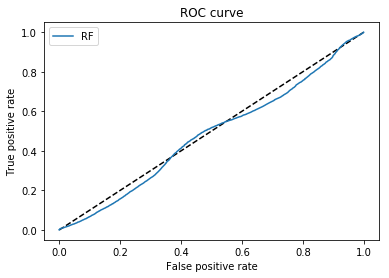

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.plot()
#plt.savefig('bmiroc.png', dpi=300)

# K Nearest Neighbor Approach

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 700, num = 10)]
weights=['uniform', 'distance']
algorithm=['ball_tree', 'kd_tree', 'brute', 'auto']
leaf_size=[20, 30, 50, 70, 80, 100, 200]
# Create the random grid
random_grid = {'n_neighbors': n_estimators,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_mixedequal, male_zero)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [35]:
knn.score(female_test.iloc[:, 0:25], more_female)

0.6557486631016043

In [36]:
knn.score(male_test.iloc[:, 0:25], more_male)

0.35956439393939393

In [37]:
knn.score(testing.iloc[:, 0:25], total_labels)

0.4666948742746615

In [138]:
list(male_zero).count(1)

16544

In [110]:
myList = list(range(10, 300))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 50 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_mixedequal, male_zero, cv=5, scoring='roc_auc')
    cv_scores.append(scores.mean())

KeyboardInterrupt: 

In [ ]:
neighbors = list(filter(lambda x: x % 100 != 0, myList))

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [17]:
from sklearn.metrics import roc_curve, auc
y_pred_rf = knn.predict_proba(testing.iloc[:, 0:25])[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(total_labels, y_pred_rf)

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
print("ROC_AUC score: " + str(roc_auc_score(total_labels, knn.predict(testing.iloc[:, 0:25]))))
print("Average Precision score: " + str(average_precision_score(total_labels, knn.predict(testing.iloc[:, 0:25]))))

ROC_AUC score: 0.5076565285204991
Average Precision score: 0.36529100393372405


[]

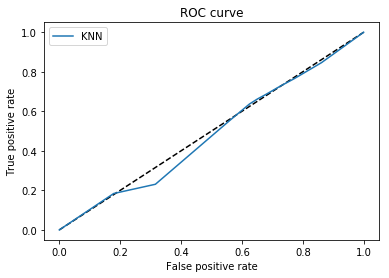

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.plot()
#plt.savefig('bmiroc.png', dpi=300)

# Random Forest - BMI Classification

In [193]:
import pandas as pd
import numpy as np
tengaps_total  = pd.read_hdf('tengaps_total.h5', 'df')

# Min number of samples is 352... total subjects after filtering is 311
tengaps_total = min_df(find_lowest_num_samples(tengaps_total), tengaps_total)


tengaps_bmi = tengaps_total[tengaps_total.weight < 400]
tengaps_bmi = tengaps_total[tengaps_total.weight > 80]

# this dataframe doesn't have demographic data
tengaps_bmi = tengaps_total.drop(columns=['sex', 'currentAge', 'weight', 'height'])

In [194]:
BMI = []
for q in list(set(tengaps_total.index.values)):
    temp = []
    temp.append(((tengaps_total.loc[q].weight.values) / (((tengaps_total.loc[q].height.values)**2))) * 703)
    BMI.append(temp)
    
BMI = np.array(BMI)
BMI = BMI.flatten()

In [195]:
def create_bins(BMI):
    '''
    Returns a list of bins (labels) depending on the BMI category
    0 - severely underweight
    1 - underweight
    2 - normal
    3 - overweight
    4 - severely overweight
    '''
    bins = []
    for x in range(0, len(BMI)):
        if BMI[x] < 18.5:
            bins.append(0)
        elif BMI[x] >= 18.5 and BMI[x] < 25:
            bins.append(1)
        elif BMI[x] >= 25 and BMI[x] < 30:
            bins.append(2)
        else:
            bins.append(3)
    return bins

In [196]:
final_bins = create_bins(BMI)
tengaps_bmi.insert(25, 'BMIbins', final_bins)

In [235]:
# This cell is dedicated to creating a balanced class training set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

numOfTotalHC = 311
numOfTrainHC = 186
numOfTestHC = 125

# Shouldn't have to one-hot encode the sex because using random forest
training = tengaps_bmi.iloc[0:(numOfTrainHC * find_lowest_num_samples(tengaps_bmi))]

X = np.array(training.iloc[:, 0:25])
X_scaled = preprocessing.scale(X)
y = np.array(training.iloc[:, 25])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

X_mixed = np.concatenate((X_train, X_test), axis=0)
y_mixed = np.concatenate((y_train, y_test), axis=0)
# Splits the training and testing into 80/20 with no sample scrambling
# Must scramble after so that training set has no test samples in it
#training = everything.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]
testing = tengaps_bmi.iloc[(numOfTrainHC * find_lowest_num_samples(tengaps_bmi)):]

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfbmi = RandomForestClassifier(n_estimators=30)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_bmi = RandomizedSearchCV(estimator = rfbmi, param_distributions = random_grid, n_iter = 20, scoring='accuracy', cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfbmi.fit(X_mixed, y_mixed)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [238]:
from sklearn.ensemble import RandomForestClassifier
bestrf = RandomForestClassifier(n_estimators=45, min_samples_split=2, min_samples_leaf=2, max_depth=50, bootstrap=False, random_state=22)

In [239]:
bestrf.fit(X_mixed, y_mixed)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

In [240]:
bestrf.score(testing.iloc[:, 0:25], testing.iloc[:, 25])

0.3642750176180409

In [241]:
from sklearn.metrics import confusion_matrix
print(str(confusion_matrix(testing.iloc[:, 25], bestrf.predict(testing.iloc[:, 0:25]))))

[[   0  132  191   29]
 [   0 9428 5156 3016]
 [   0 9315 5322 2259]
 [   0 6497 2272 1791]]


# Random Forest Regressor - BMI

In [281]:
import pandas as pd
import numpy as np
tengaps_total  = pd.read_hdf('tengaps_total.h5', 'df')

# Min number of samples is 352... total subjects after filtering is 311
tengaps_total = min_df(find_lowest_num_samples(tengaps_total), tengaps_total)


tengaps_bmi = tengaps_total[tengaps_total.weight < 400]
tengaps_bmi = tengaps_total[tengaps_total.weight > 80]

# this dataframe doesn't have demographic data
tengaps_bmiflat = tengaps_total.drop(columns=['sex', 'currentAge', 'weight', 'height'])

In [282]:
BMI = []
for q in list(set(tengaps_total.index.values)):
    temp = []
    temp.append(((tengaps_total.loc[q].weight.values) / (((tengaps_total.loc[q].height.values)**2))) * 703)
    BMI.append(temp)
    
BMI = np.array(BMI)
BMI = BMI.flatten()
tengaps_bmiflat.insert(25, 'BMI', BMI)

In [284]:
# This cell is dedicated to creating a balanced class training set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

numOfTotalHC = 311
numOfTrainHC = 186
numOfTestHC = 125

# Shouldn't have to one-hot encode the sex because using random forest
training = tengaps_bmiflat.iloc[0:(numOfTrainHC * find_lowest_num_samples(tengaps_bmiflat))]

X = np.array(training.iloc[:, 0:25])
X_scaled = preprocessing.scale(X)
y = np.array(training.iloc[:, 25])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

X_mixed = np.concatenate((X_train, X_test), axis=0)
y_mixed = np.concatenate((y_train, y_test), axis=0)
# Splits the training and testing into 80/20 with no sample scrambling
# Must scramble after so that training set has no test samples in it
#training = everything.iloc[0:(numOfTrainHC * find_lowest_num_samples(newtotal_df))]
testing = tengaps_bmiflat.iloc[(numOfTrainHC * find_lowest_num_samples(tengaps_bmiflat)):]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfreg = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_rand_reg = RandomizedSearchCV(estimator = rfreg, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_rand_reg.fit(X_mixed, y_mixed)

In [285]:
from sklearn.ensemble import RandomForestRegressor
rfregfinal = RandomForestRegressor(n_estimators=230, min_samples_split=10, min_samples_leaf=4, max_depth=90, bootstrap=False, random_state=22)
rfregfinal.fit(X_mixed, y_mixed)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=90,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=1,
           oob_score=False, random_state=22, verbose=0, warm_start=False)

In [287]:
# WORSE THAN A HORIZONTAL LINE... BAD
rfregfinal.score(testing.iloc[:, 0:25], testing.iloc[:, 25])

-0.007860755320008073

# K Nearest Neighbor - BMI Classification

In [244]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

kbmi = KNeighborsClassifier(n_neighbors=9)
kbmi.fit(X_mixed, y_mixed)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [245]:
kbmi.score(testing.iloc[:, 0:25],testing.iloc[:, 25])

0.38909443269908384